# State teleportation

In [1]:
from blueqat import photonqat as pq
import numpy as np
import matplotlib.pyplot as plt

## Photonqat

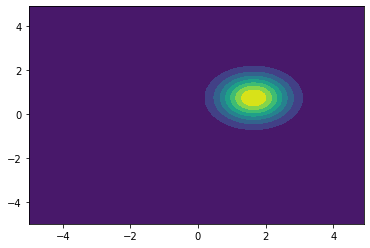

measured x = 5.56927580549033
measured p = 1.0231942486450023
teleported mu = [1.64666489 0.73372308]


In [2]:
r = 2

G = pq.Gaussian(3)

G.D(0, 1 + 0.5j) # state to teleport
G.S(1, -r)
G.S(2, r)
G.BS(1, 2, np.pi/4) # 50:50 beam splitter
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.MeasX(0)
G.MeasP(1)
G.X(2, G.Creg(0, "x", scale = np.sqrt(2)))
G.Z(2, G.Creg(1, "p", scale = np.sqrt(2)))
G.run()

G.Wigner(2) # plot
print('measured x =', G.Creg(0, "x").read())
print('measured p =', G.Creg(1, "p").read())
print('teleported mu =', G.mean(2)) # mu of qumode 0